# Titanic Survival Prediction

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
dataset_path = 'titanic_modified_dataset.csv'
df = pd.read_csv(
    dataset_path,
    index_col='PassengerId'
)
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Survived
PassengerId,,,,,,,,,
1,3,0,22.0,1,0,7.2500,0,0,0
2,1,1,38.0,1,0,71.2833,1,1,1
3,3,1,26.0,0,0,7.9250,0,2,1
4,1,1,35.0,1,0,53.1000,0,1,1
5,3,0,35.0,0,0,8.0500,0,0,0
...,...,...,...,...,...,...,...,...,...
887,2,0,27.0,0,0,13.0000,0,5,0
888,1,1,19.0,0,0,30.0000,0,2,1
889,3,1,28.0,1,2,23.4500,0,2,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    int64  
 7   Title     891 non-null    int64  
 8   Survived  891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 69.6 KB


In [ ]:
df.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Survived
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,0.352413,29.361582,0.523008,0.381594,32.204208,0.359147,0.936027,0.383838
std,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429,0.638707,1.725341,0.486592
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,0.000000,0.000000,0.000000
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000,2.000000,1.000000
max,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000,16.000000,1.000000


In [ ]:
dataset = df.to_numpy().astype(np.float64)
X, y = dataset[:, :-1], dataset[:, -1]

In [ ]:
intercept = np.ones((X.shape[0], 1))
X_b = np.hstack((intercept, X))

In [ ]:
intercept

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [ ]:
X

array([[ 3.    ,  0.    , 22.    , ...,  7.25  ,  0.    ,  0.    ],
       [ 1.    ,  1.    , 38.    , ..., 71.2833,  1.    ,  1.    ],
       [ 3.    ,  1.    , 26.    , ...,  7.925 ,  0.    ,  2.    ],
       ...,
       [ 3.    ,  1.    , 28.    , ..., 23.45  ,  0.    ,  2.    ],
       [ 1.    ,  0.    , 26.    , ..., 30.    ,  1.    ,  0.    ],
       [ 3.    ,  0.    , 32.    , ...,  7.75  ,  2.    ,  0.    ]])

In [ ]:
X_b

array([[ 1.    ,  3.    ,  0.    , ...,  7.25  ,  0.    ,  0.    ],
       [ 1.    ,  1.    ,  1.    , ..., 71.2833,  1.    ,  1.    ],
       [ 1.    ,  3.    ,  1.    , ...,  7.925 ,  0.    ,  2.    ],
       ...,
       [ 1.    ,  3.    ,  1.    , ..., 23.45  ,  0.    ,  2.    ],
       [ 1.    ,  1.    ,  0.    , ..., 30.    ,  1.    ,  0.    ],
       [ 1.    ,  3.    ,  0.    , ...,  7.75  ,  2.    ,  0.    ]])

In [ ]:
X.shape

(891, 8)

In [ ]:
X_b.shape

(891, 9)

In [ ]:
val_size = 0.2
test_size = 0.125
random_state = 2
is_shuffle = True

X_train, X_val, y_train, y_val = train_test_split(
    X_b, y,
    test_size=val_size,
    random_state=random_state,
    shuffle=is_shuffle
)

X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train,
    test_size=test_size,
    random_state=random_state,
    shuffle=is_shuffle
)


In [ ]:
normalizer = StandardScaler()
X_train[:, 1:] = normalizer.fit_transform(X_train[:, 1:])
X_val[:, 1:] = normalizer.transform(X_val[:, 1:])
X_test[:, 1:] = normalizer.transform(X_test[:, 1:])

In [ ]:
lr = 0.01
epochs = 100
batch_size = 16

np.random.seed(random_state)
theta = np.random.uniform(size=X_train.shape[1])

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def predict(X, theta):
    z = np.dot(X, theta)
    y_hat = sigmoid(z)
    return y_hat

def compute_loss(y_hat, y):
    y_hat = np.clip(y_hat, 1e-7, 1 - 1e-7)
    return (-y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat)).mean()

def compute_gradient(X, y, y_hat):
    dtheta = np.dot(X.T, y_hat - y) / y.size
    return dtheta

def update_theta(theta, dtheta, lr):
    theta = theta - lr * dtheta
    return theta

def compute_accuracy(X, theta, y):
    y_hat = predict(X, theta).round()
    acc = (y_hat == y).mean()
    return acc

In [ ]:
train_accs = []
train_losses = []
val_accs = []
val_losses = []

for epoch in range(epochs):
    train_batch_losses = []
    train_batch_accs = []
    val_batch_losses = []
    val_batch_accs = []

    for i in range(0, X_train.shape[0], batch_size):

        X_i = X_train[i: i + batch_size]
        y_i = y_train[i: i + batch_size]

        y_hat = predict(X_i, theta)
        train_loss = compute_loss(y_hat, y_i)
        dtheta = compute_gradient(X_i, y_i, y_hat)
        theta = update_theta(theta, dtheta, lr)
        train_batch_losses.append(train_loss)
        train_acc = compute_accuracy(X_train, theta, y_train)
        train_batch_accs.append(train_acc)

        y_val_hat = predict(X_val, theta)
        val_loss = compute_loss(y_val_hat, y_val)
        val_batch_losses.append(val_loss)
        val_acc = compute_accuracy(X_val, theta, y_val)
        val_batch_accs.append(val_acc)

    train_batch_loss = sum(train_batch_losses) / len(train_batch_losses)
    val_batch_loss = sum(val_batch_losses) / len(val_batch_losses)
    train_batch_acc = sum(train_batch_accs) / len(train_batch_accs)
    val_batch_acc = sum(val_batch_accs) / len(val_batch_accs)

    train_losses.append(train_batch_loss)
    train_accs.append(train_batch_acc)
    val_losses.append(val_batch_loss)
    val_accs.append(val_batch_acc)

    print(f'\nEPOCH {epoch + 1}:\tTraining Loss: {train_batch_loss:.3f}\tValidation Loss: {val_batch_loss:.3f}')


EPOCH 1:	Training Loss: 0.703	Validation Loss: 0.599

EPOCH 2:	Training Loss: 0.670	Validation Loss: 0.582

EPOCH 3:	Training Loss: 0.640	Validation Loss: 0.567

EPOCH 4:	Training Loss: 0.614	Validation Loss: 0.555

EPOCH 5:	Training Loss: 0.592	Validation Loss: 0.544

EPOCH 6:	Training Loss: 0.572	Validation Loss: 0.535

EPOCH 7:	Training Loss: 0.554	Validation Loss: 0.528

EPOCH 8:	Training Loss: 0.539	Validation Loss: 0.522

EPOCH 9:	Training Loss: 0.526	Validation Loss: 0.517

EPOCH 10:	Training Loss: 0.514	Validation Loss: 0.513

EPOCH 11:	Training Loss: 0.504	Validation Loss: 0.509

EPOCH 12:	Training Loss: 0.495	Validation Loss: 0.507

EPOCH 13:	Training Loss: 0.487	Validation Loss: 0.505

EPOCH 14:	Training Loss: 0.480	Validation Loss: 0.503

EPOCH 15:	Training Loss: 0.474	Validation Loss: 0.502

EPOCH 16:	Training Loss: 0.468	Validation Loss: 0.501

EPOCH 17:	Training Loss: 0.463	Validation Loss: 0.500

EPOCH 18:	Training Loss: 0.459	Validation Loss: 0.500

EPOCH 19:	Training

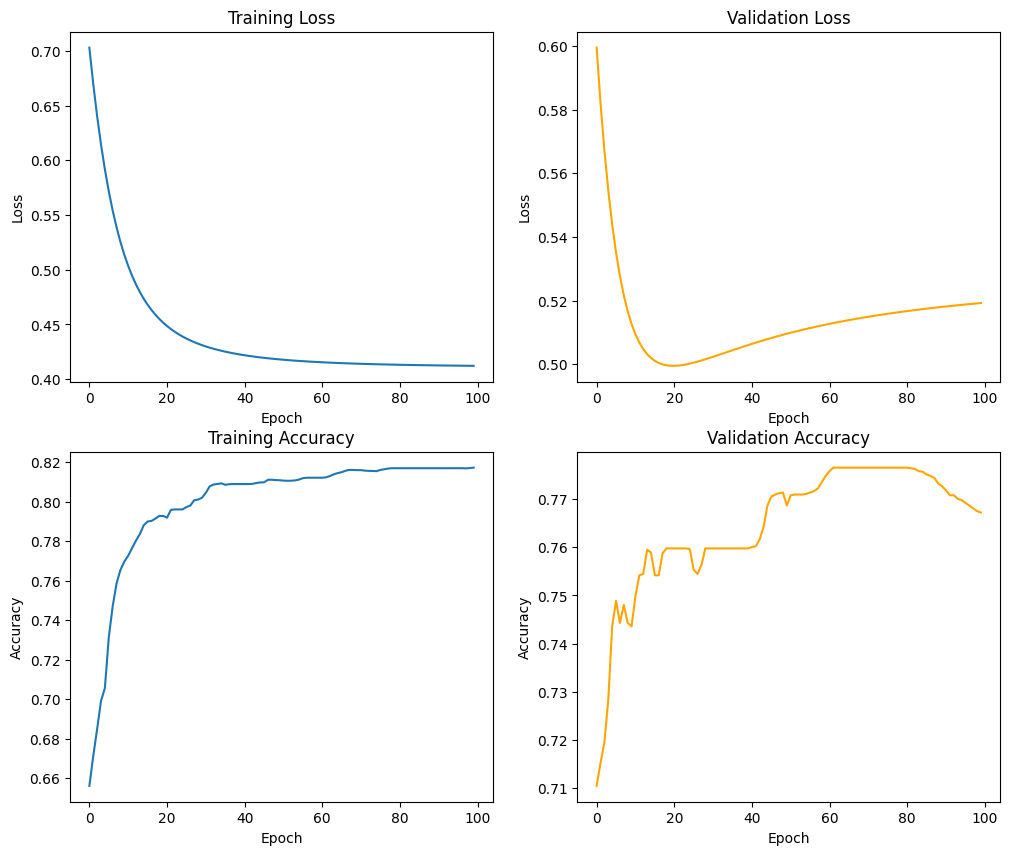

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
ax[0, 0].plot(train_losses)
ax[0, 0].set(xlabel='Epoch', ylabel='Loss')
ax[0, 0].set_title('Training Loss')

ax[0, 1].plot(val_losses, 'orange')
ax[0, 1].set(xlabel='Epoch', ylabel='Loss')
ax[0, 1].set_title('Validation Loss')

ax[1, 0].plot(train_accs)
ax[1, 0].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 0].set_title('Training Accuracy')

ax[1, 1].plot(val_accs, 'orange')
ax[1, 1].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 1].set_title('Validation Accuracy')

plt.show()

In [ ]:
val_set_acc = compute_accuracy(X_val, theta, y_val)
test_set_acc = compute_accuracy(X_test, theta,y_test)
print('Evaluation on validation and test set :')
print(f'Validation Accuracy: {val_set_acc}')
print(f'Test Accuracy: {test_set_acc}')

Evaluation on validation and test set :
Validation Accuracy: 0.776536312849162
Test Accuracy: 0.7865168539325843


# Twitter Sentiment Analysis

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from nltk.tokenize import TweetTokenizer
from collections import defaultdict

In [ ]:
dataset_path = 'sentiment_analysis.csv'
df = pd.read_csv(
    dataset_path,
    index_col='id'
)

In [ ]:
def text_normalize(text):
    text = re.sub(r'^RT[\s]+', '', text)
    text = re.sub(r'https?:\/\/.*[\ r\n]*', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'^[\w\s]', '', text)

    tokenizer = TweetTokenizer(
        preserve_case=False,
        strip_handles=True,
        reduce_len=True
    )

    text_tokens = tokenizer.tokenize(text)
    return text_tokens

def get_freqs(df):
    freqs = defaultdict(lambda: 0)
    for idx, row in df.iterrows():
        tweet = row['tweet']
        label = row['label']

        tokens = text_normalize(tweet)
        for token in tokens:
            pair = (token, label)
            freqs[pair] += 1

    return freqs

def get_feature(text, freqs):
    tokens = text_normalize(text)
    X = np.zeros(3)
    X[0] = 1

    for token in tokens:
        X[1] += freqs[(token, 0)]
        X[2] += freqs[(token, 1)]

    return X

In [ ]:
X = []
y = []

freqs = get_freqs(df)
for idx, row in df.iterrows():
    tweet = row['tweet']
    label = row['label']

    X_i = get_feature(tweet, freqs)

    X.append(X_i)
    y.append(label)

X = np.array(X)
y = np.array(y)


In [ ]:
val_size = 0.2
test_size = 0.125
random_state = 2
is_shuffle = True

X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=val_size,
    random_state=random_state,
    shuffle=is_shuffle
)

X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train,
    test_size=test_size,
    random_state=random_state,
    shuffle=is_shuffle
)

In [ ]:
normalizer = StandardScaler()
X_train[:, 1:] = normalizer.fit_transform(X_train[:, 1:])
X_val[:, 1:] = normalizer.transform(X_val[:, 1:])
X_test[:, 1:] = normalizer.transform(X_test[:, 1:])

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def predict(X, theta):
    z = np.dot(X, theta)
    y_hat = sigmoid(z)
    return y_hat

def compute_loss(y_hat, y):
    y_hat = np.clip(y_hat, 1e-7, 1 - 1e-7)
    return (-y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat)).mean()

def compute_gradient(X, y, y_hat):
    dtheta = np.dot(X.T, y_hat - y) / y.size
    return dtheta

def update_theta(theta, dtheta, lr):
    theta = theta - lr * dtheta
    return theta

def compute_accuracy(X, theta, y):
    y_hat = predict(X, theta).round()
    acc = (y_hat == y).mean()
    return acc

In [ ]:
lr = 0.01
epochs = 200
batch_size = 128

np.random.seed(random_state)
theta = np.random.uniform(size=X_train.shape[1])

In [ ]:
train_accs = []
train_losses = []
val_accs = []
val_losses = []

for epoch in range(epochs):
    train_batch_losses = []
    train_batch_accs = []
    val_batch_losses = []
    val_batch_accs = []

    for i in range(0, X_train.shape[0], batch_size):

        X_i = X_train[i: i + batch_size]
        y_i = y_train[i: i + batch_size]

        y_hat = predict(X_i, theta)
        train_loss = compute_loss(y_hat, y_i)
        dtheta = compute_gradient(X_i, y_i, y_hat)
        theta = update_theta(theta, dtheta, lr)
        train_batch_losses.append(train_loss)
        train_acc = compute_accuracy(X_train, theta, y_train)
        train_batch_accs.append(train_acc)

        y_val_hat = predict(X_val, theta)
        val_loss = compute_loss(y_val_hat, y_val)
        val_batch_losses.append(val_loss)
        val_acc = compute_accuracy(X_val, theta, y_val)
        val_batch_accs.append(val_acc)

    train_batch_loss = sum(train_batch_losses) / len(train_batch_losses)
    val_batch_loss = sum(val_batch_losses) / len(val_batch_losses)
    train_batch_acc = sum(train_batch_accs) / len(train_batch_accs)
    val_batch_acc = sum(val_batch_accs) / len(val_batch_accs)

    train_losses.append(train_batch_loss)
    train_accs.append(train_batch_acc)
    val_losses.append(val_batch_loss)
    val_accs.append(val_batch_acc)

    print(f'\nEPOCH {epoch + 1}:\tTraining Loss: {train_batch_loss:.3f}\tValidation Loss: {val_batch_loss:.3f}')


EPOCH 1:	Training Loss: 0.715	Validation Loss: 0.715

EPOCH 2:	Training Loss: 0.670	Validation Loss: 0.670

EPOCH 3:	Training Loss: 0.633	Validation Loss: 0.633

EPOCH 4:	Training Loss: 0.602	Validation Loss: 0.603

EPOCH 5:	Training Loss: 0.577	Validation Loss: 0.578

EPOCH 6:	Training Loss: 0.557	Validation Loss: 0.558

EPOCH 7:	Training Loss: 0.540	Validation Loss: 0.540

EPOCH 8:	Training Loss: 0.525	Validation Loss: 0.526

EPOCH 9:	Training Loss: 0.513	Validation Loss: 0.514

EPOCH 10:	Training Loss: 0.502	Validation Loss: 0.503

EPOCH 11:	Training Loss: 0.494	Validation Loss: 0.494

EPOCH 12:	Training Loss: 0.486	Validation Loss: 0.486

EPOCH 13:	Training Loss: 0.479	Validation Loss: 0.480

EPOCH 14:	Training Loss: 0.474	Validation Loss: 0.474

EPOCH 15:	Training Loss: 0.469	Validation Loss: 0.469

EPOCH 16:	Training Loss: 0.464	Validation Loss: 0.464

EPOCH 17:	Training Loss: 0.460	Validation Loss: 0.460

EPOCH 18:	Training Loss: 0.456	Validation Loss: 0.456

EPOCH 19:	Training

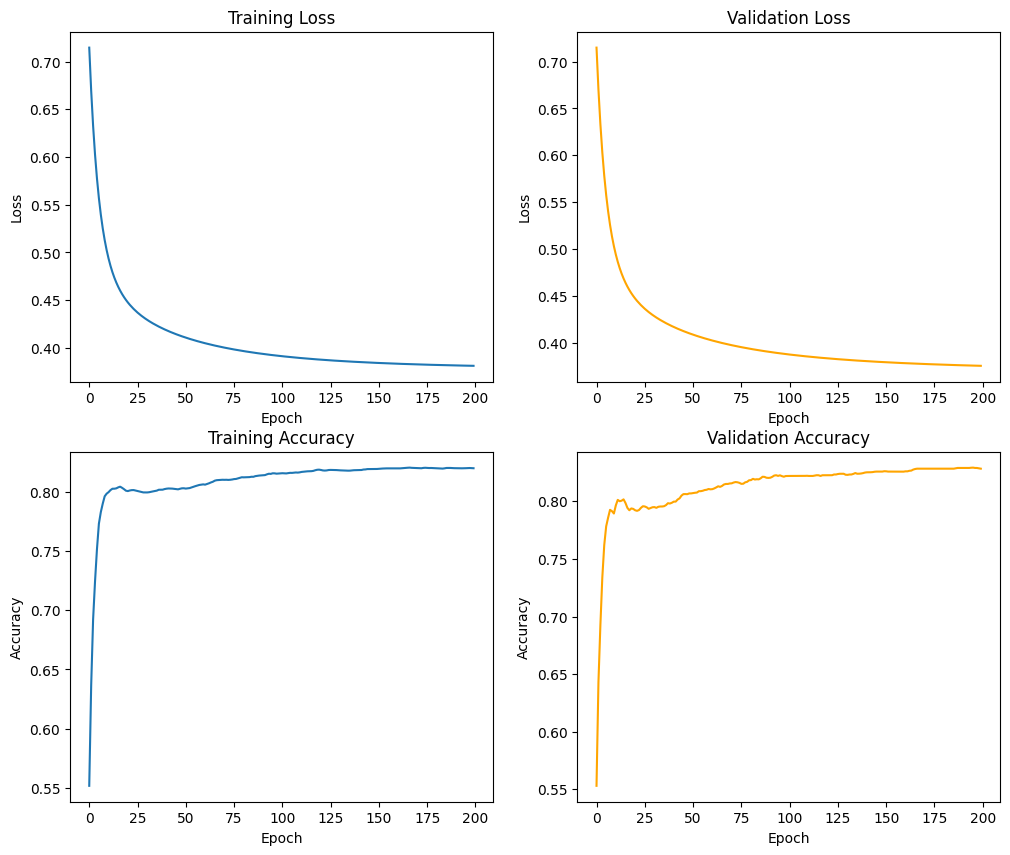

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
ax[0, 0].plot(train_losses)
ax[0, 0].set(xlabel='Epoch', ylabel='Loss')
ax[0, 0].set_title('Training Loss')

ax[0, 1].plot(val_losses, 'orange')
ax[0, 1].set(xlabel='Epoch', ylabel='Loss')
ax[0, 1].set_title('Validation Loss')

ax[1, 0].plot(train_accs)
ax[1, 0].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 0].set_title('Training Accuracy')

ax[1, 1].plot(val_accs, 'orange')
ax[1, 1].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 1].set_title('Validation Accuracy')

plt.show()

In [ ]:
val_set_acc = compute_accuracy(X_val, theta, y_val)
test_set_acc = compute_accuracy(X_test, theta,y_test)
print('Evaluation on validation and test set :')
print(f'Validation Accuracy: {val_set_acc}')
print(f'Test Accuracy: {test_set_acc}')

Evaluation on validation and test set :
Validation Accuracy: 0.8282828282828283
Test Accuracy: 0.8308080808080808
